# PREDICTING SOLAR ELECTRIC

Predicting next hour solar energy production of CINGILLI GES(in Niğde). Between 2019-
10-09 and 2021-02-02 (both included).

generating lag and moving average features

6 models evaluated and 1 hour and 2 hour lag variables selected as best variables

Best Model Formüla <br/>
production  ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag + Production2hourlag + Cloud2hourlag +  Dswrf2hourlag + Temp2hourlag

In [96]:
#install.packages(ggplot2)
#install.packages(gridExtra)
#install.packages(data.table)
#install.packages(skimr)
#install.packages(dplyr)
#install.packages(GGally)
#install.packages(ggcorrplot)
#install.packages(Hmisc)
#install.packages(zoo)

require(ggplot2)
require(gridExtra)
require(data.table)
require(skimr)
require(dplyr)
require(GGally)
require(ggcorrplot)
require(Hmisc)
require(zoo)

options(repr.plot.width=15, repr.plot.height=8) 

solar= read.csv("production_data_with_weather.csv")

#### pakages and data loaded

In [4]:
str(solar)

'data.frame':	11592 obs. of  16 variables:
 $ Date                       : chr  "2019-10-09" "2019-10-09" "2019-10-09" "2019-10-09" ...
 $ Hour                       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Production                 : num  0 0 0 0 0 ...
 $ timestamp                  : chr  "2019-10-09T00:00:00Z" "2019-10-09T01:00:00Z" "2019-10-09T02:00:00Z" "2019-10-09T03:00:00Z" ...
 $ CLOUD_LOW_LAYER_37.75_34.25: int  0 0 0 0 0 0 0 0 0 0 ...
 $ CLOUD_LOW_LAYER_37.75_34.5 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CLOUD_LOW_LAYER_38_34.25   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CLOUD_LOW_LAYER_38_34.5    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DSWRF_37.75_34.25          : int  0 0 0 0 0 0 0 0 20 62 ...
 $ DSWRF_37.75_34.5           : int  0 0 0 0 0 0 0 0 20 63 ...
 $ DSWRF_38_34.25             : int  0 0 0 0 0 0 0 0 20 62 ...
 $ DSWRF_38_34.5              : int  0 0 0 0 0 0 0 0 20 64 ...
 $ TEMP_37.75_34.25           : num  17.1 16.9 15.9 15.1 14.9 ...
 $ TEMP_37.75_34.5            : num  16.4 15.7 14.6 13.8 

#### sample of data

In [5]:
head(data.table(solar))

Date,Hour,Production,timestamp,CLOUD_LOW_LAYER_37.75_34.25,CLOUD_LOW_LAYER_37.75_34.5,CLOUD_LOW_LAYER_38_34.25,CLOUD_LOW_LAYER_38_34.5,DSWRF_37.75_34.25,DSWRF_37.75_34.5,DSWRF_38_34.25,DSWRF_38_34.5,TEMP_37.75_34.25,TEMP_37.75_34.5,TEMP_38_34.25,TEMP_38_34.5
<chr>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2019-10-09,0,0,2019-10-09T00:00:00Z,0,0,0,0,0,0,0,0,17.071,16.411,14.531,12.411
2019-10-09,1,0,2019-10-09T01:00:00Z,0,0,0,0,0,0,0,0,16.949,15.729,13.959,11.939
2019-10-09,2,0,2019-10-09T02:00:00Z,0,0,0,0,0,0,0,0,15.886,14.636,13.476,11.426
2019-10-09,3,0,2019-10-09T03:00:00Z,0,0,0,0,0,0,0,0,15.106,13.796,12.856,11.066
2019-10-09,4,0,2019-10-09T04:00:00Z,0,0,0,0,0,0,0,0,14.910,13.540,12.650,11.220
2019-10-09,5,0,2019-10-09T05:00:00Z,0,0,0,0,0,0,0,0,14.076,13.226,12.286,11.386


#### first 5 rows of data

In [6]:
skim(solar) #summary(solar)

-- Data Summary ------------------------
                           Values
Name                       solar 
Number of rows             11592 
Number of columns          16    
_______________________          
Column type frequency:           
  character                2     
  numeric                  14    
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 2 x 8
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
* <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
1 Date                  0             1    10    10     0      483          0
2 timestamp             0             1    20    20     0    11592          0

-- Variable type: numeric ------------------------------------------------------
# A tibble: 14 x 11
   skim_variable               n_missing complete_rate   mean     sd    p0   p25
 * <chr>                

In [82]:
solarprodhourly = solar %>%
                      group_by(Hour) %>%
                      summarise(
                              count = n(),
                              mean_production = mean(Production),
                              min_production = min(Production),
                              max_production = max(Production)
                                )
solarprodhourly

Hour,count,mean_production,min_production,max_production
<int>,<int>,<dbl>,<dbl>,<dbl>
0,483,0.00000000,0,0.00
1,483,0.00000000,0,0.00
2,483,0.00000000,0,0.00
3,483,0.00000000,0,0.00
4,483,0.00000000,0,0.00
5,483,0.03639752,0,11.00
6,483,0.35933747,0,13.98
7,483,2.37225673,0,11.60
8,483,7.41325052,0,23.96


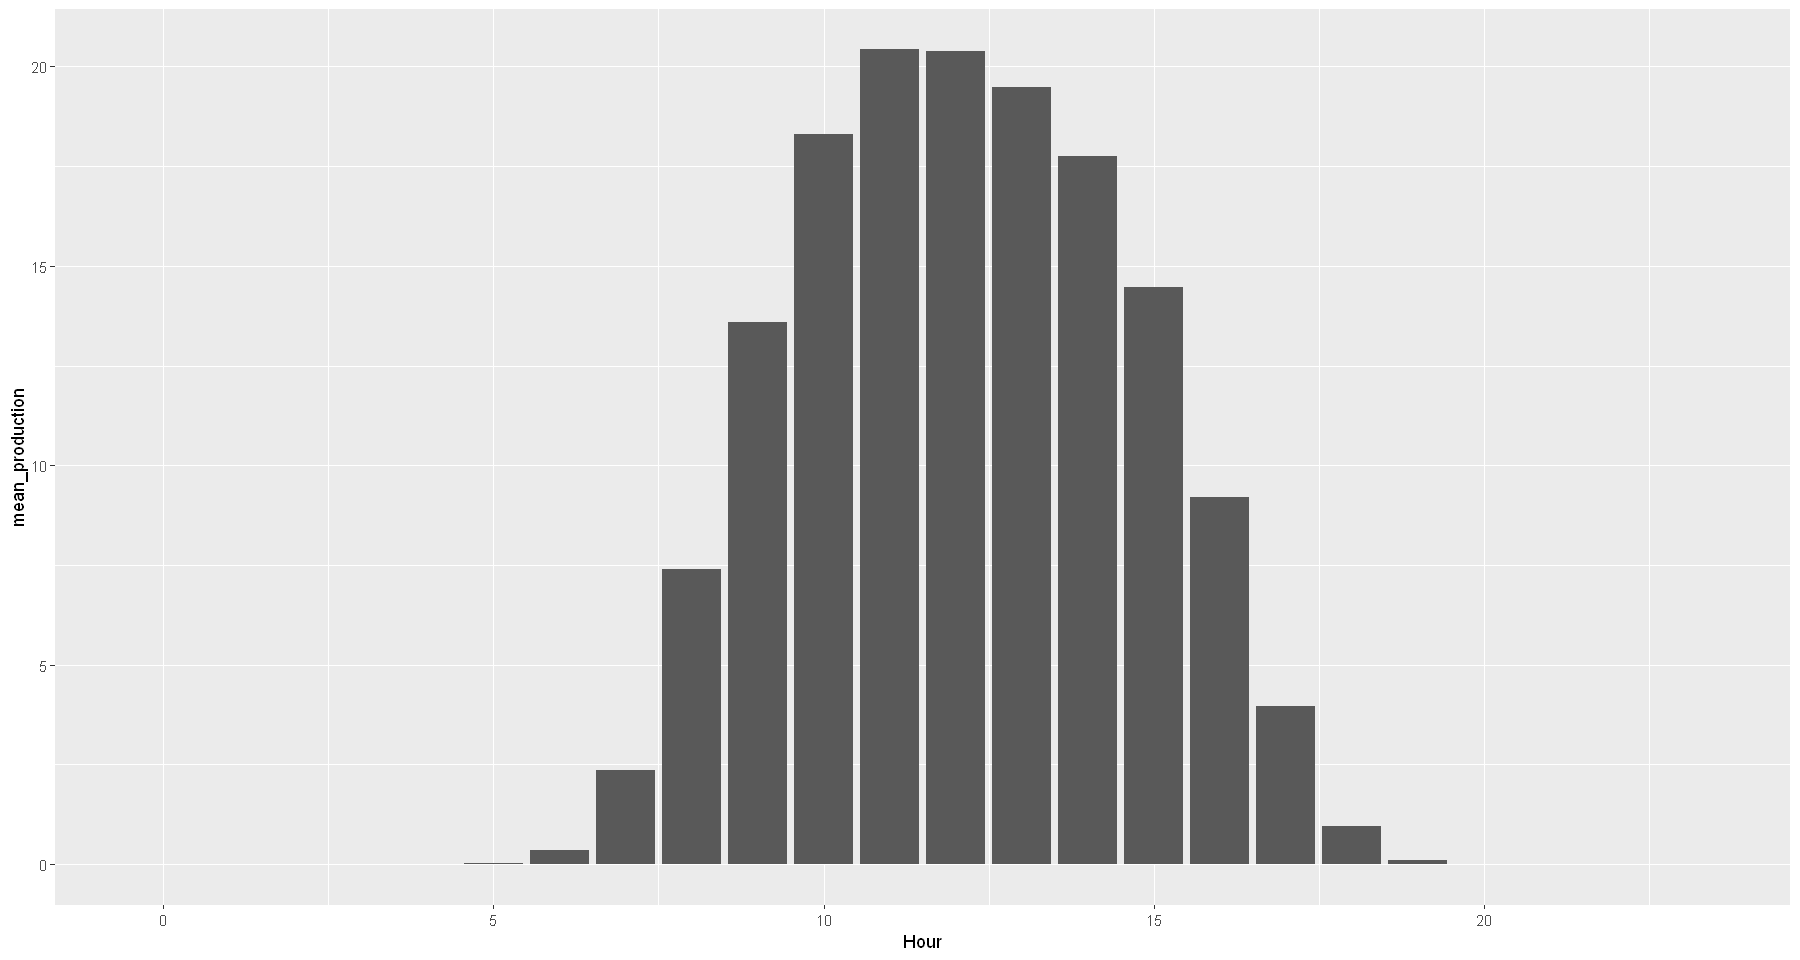

In [9]:
ggplot(solarprodhourly, aes(x=Hour, y=mean_production)) + geom_bar(stat = "identity")

#### production histogram shows that only daytime production occurs.

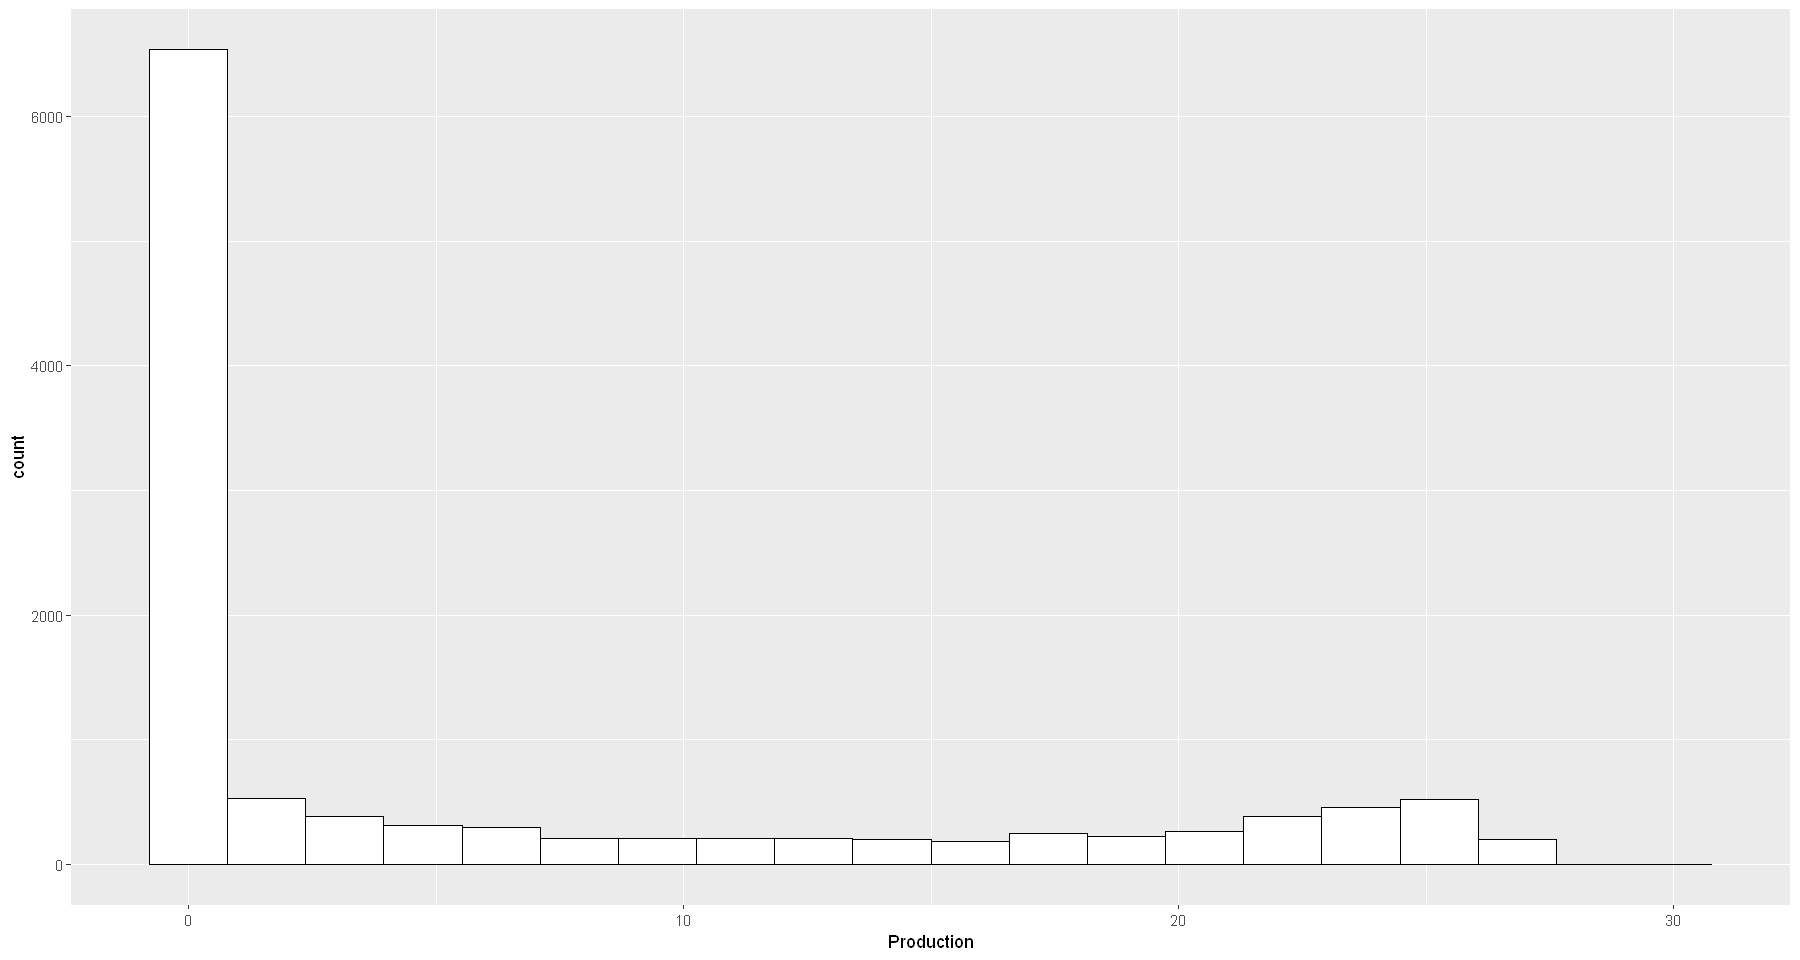

In [10]:
ggplot(solar, aes(x=Production)) + geom_histogram(color="black", fill="white", bins = 20)

#### In the night, most of the time production is 0 or nearly zero

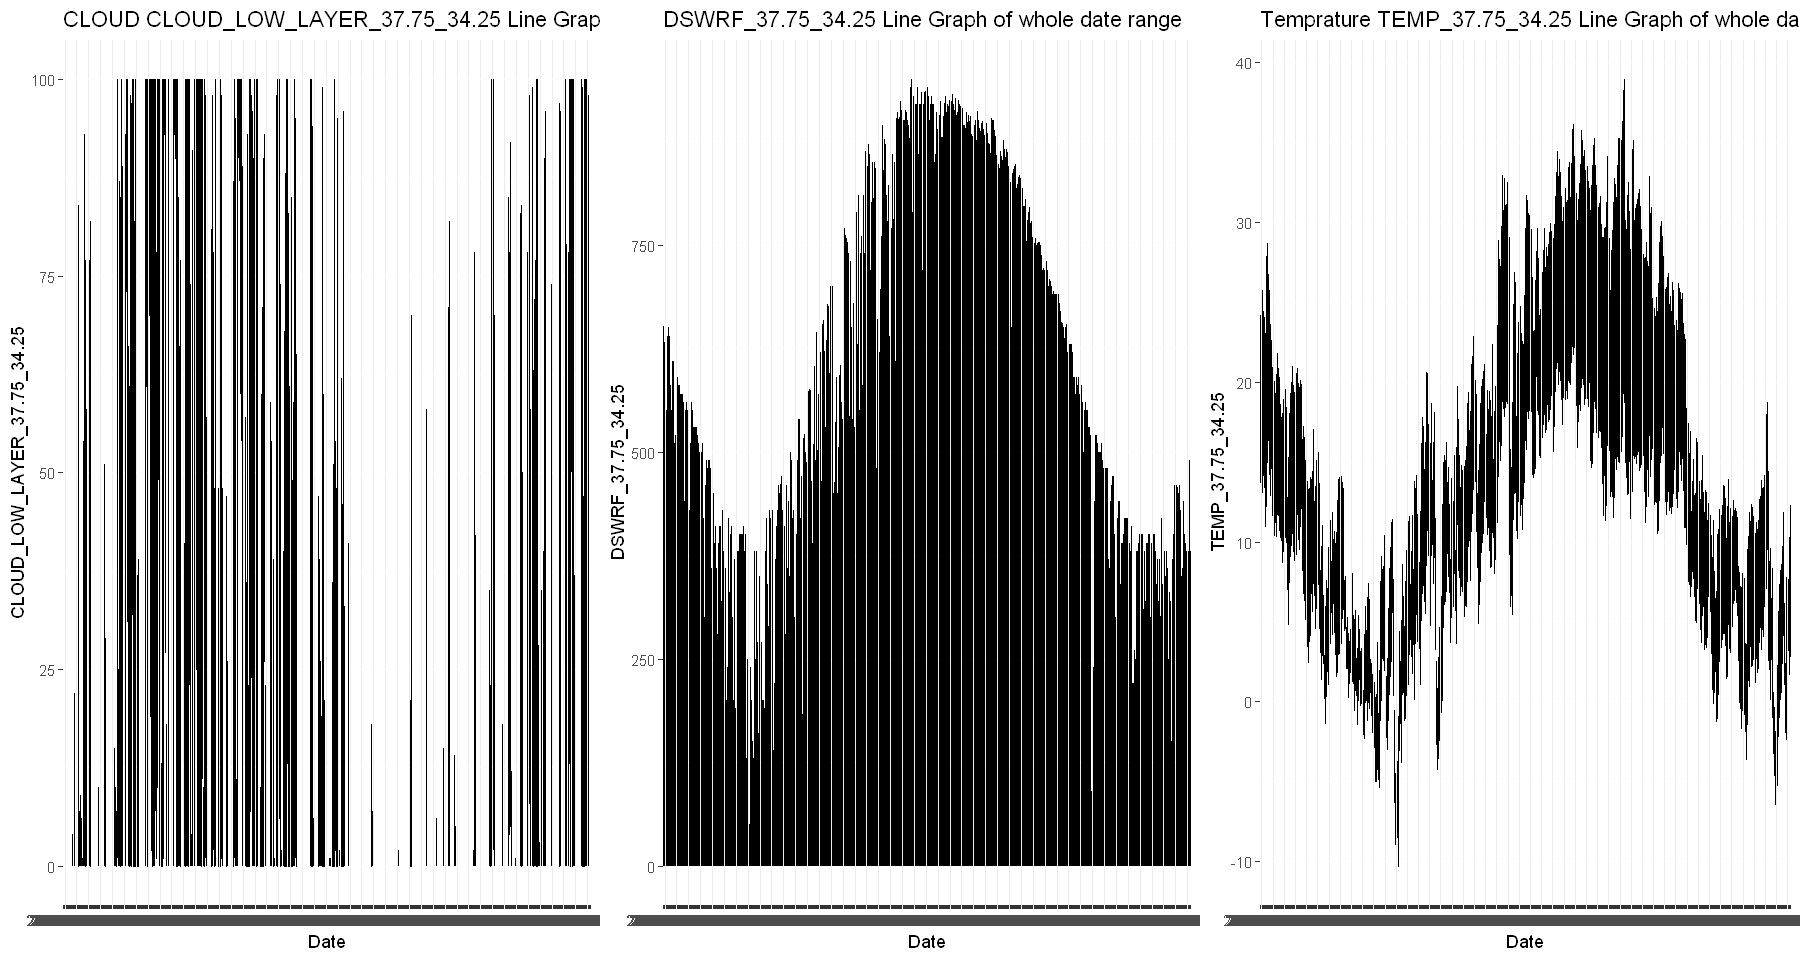

In [13]:
g1  = ggplot(solar, aes(x=Date, y=CLOUD_LOW_LAYER_37.75_34.25)) + geom_line() + ggtitle("CLOUD CLOUD_LOW_LAYER_37.75_34.25 Line Graph of whole date range")
g2  = ggplot(solar, aes(x=Date, y=DSWRF_37.75_34.25)) + geom_line() + ggtitle("DSWRF_37.75_34.25 Line Graph of whole date range")
g3  = ggplot(solar, aes(x=Date, y=TEMP_37.75_34.25)) + geom_line() + ggtitle("Temprature TEMP_37.75_34.25 Line Graph of whole date range")
grid.arrange(g1, g2, g3,ncol=3)

#### Relationship graphs between cloud, dswrf and temp

In [83]:
solarnumerics = solar[,c(2:3,5:length(colnames(solar)))]
cor(solarnumerics)

,Hour,Production,CLOUD_LOW_LAYER_37.75_34.25,CLOUD_LOW_LAYER_37.75_34.5,CLOUD_LOW_LAYER_38_34.25,CLOUD_LOW_LAYER_38_34.5,DSWRF_37.75_34.25,DSWRF_37.75_34.5,DSWRF_38_34.25,DSWRF_38_34.5,TEMP_37.75_34.25,TEMP_37.75_34.5,TEMP_38_34.25,TEMP_38_34.5
Hour,1.00000000,0.06255799,0.03514322,0.03505125,0.03071042,0.04126077,0.3276022,0.3248731,0.3270810,0.3221175,0.1938524,0.1810627,0.1783152,0.1552778
Production,0.06255799,1.00000000,-0.19059645,-0.18277395,-0.18818871,-0.17749514,0.7387504,0.7419796,0.7375579,0.7456623,0.3798260,0.4000367,0.3969881,0.4008097
CLOUD_LOW_LAYER_37.75_34.25,0.03514322,-0.19059645,1.00000000,0.94838354,0.83259471,0.82306598,-0.1666506,-0.1677237,-0.1598543,-0.1647597,-0.3883983,-0.3943344,-0.4006903,-0.4050515
CLOUD_LOW_LAYER_37.75_34.5,0.03505125,-0.18277395,0.94838354,1.00000000,0.81301517,0.84735419,-0.1567631,-0.1679597,-0.1527147,-0.1618018,-0.4009498,-0.4062535,-0.4126143,-0.4173753
CLOUD_LOW_LAYER_38_34.25,0.03071042,-0.18818871,0.83259471,0.81301517,1.00000000,0.87546781,-0.1626017,-0.1643049,-0.1787984,-0.1785938,-0.3520783,-0.3563810,-0.3580219,-0.3636616
CLOUD_LOW_LAYER_38_34.5,0.04126077,-0.17749514,0.82306598,0.84735419,0.87546781,1.00000000,-0.1352504,-0.1449914,-0.1463185,-0.1664040,-0.3444833,-0.3475717,-0.3524242,-0.3567669
DSWRF_37.75_34.25,0.32760216,0.73875042,-0.16665063,-0.15676306,-0.16260167,-0.13525036,1.0000000,0.9959357,0.9936406,0.9892898,0.5835334,0.5842799,0.5749825,0.5606617
DSWRF_37.75_34.5,0.32487305,0.74197960,-0.16772374,-0.16795968,-0.16430493,-0.14499143,0.9959357,1.0000000,0.9907229,0.9904409,0.5821503,0.5839710,0.5737220,0.5600753
DSWRF_38_34.25,0.32708103,0.73755794,-0.15985432,-0.15271466,-0.17879842,-0.14631847,0.9936406,0.9907229,1.0000000,0.9931348,0.5806740,0.5814408,0.5734532,0.5588917
DSWRF_38_34.5,0.32211750,0.74566228,-0.16475974,-0.16180177,-0.17859381,-0.16640404,0.9892898,0.9904409,0.9931348,1.0000000,0.5722221,0.5735400,0.5653825,0.5524414


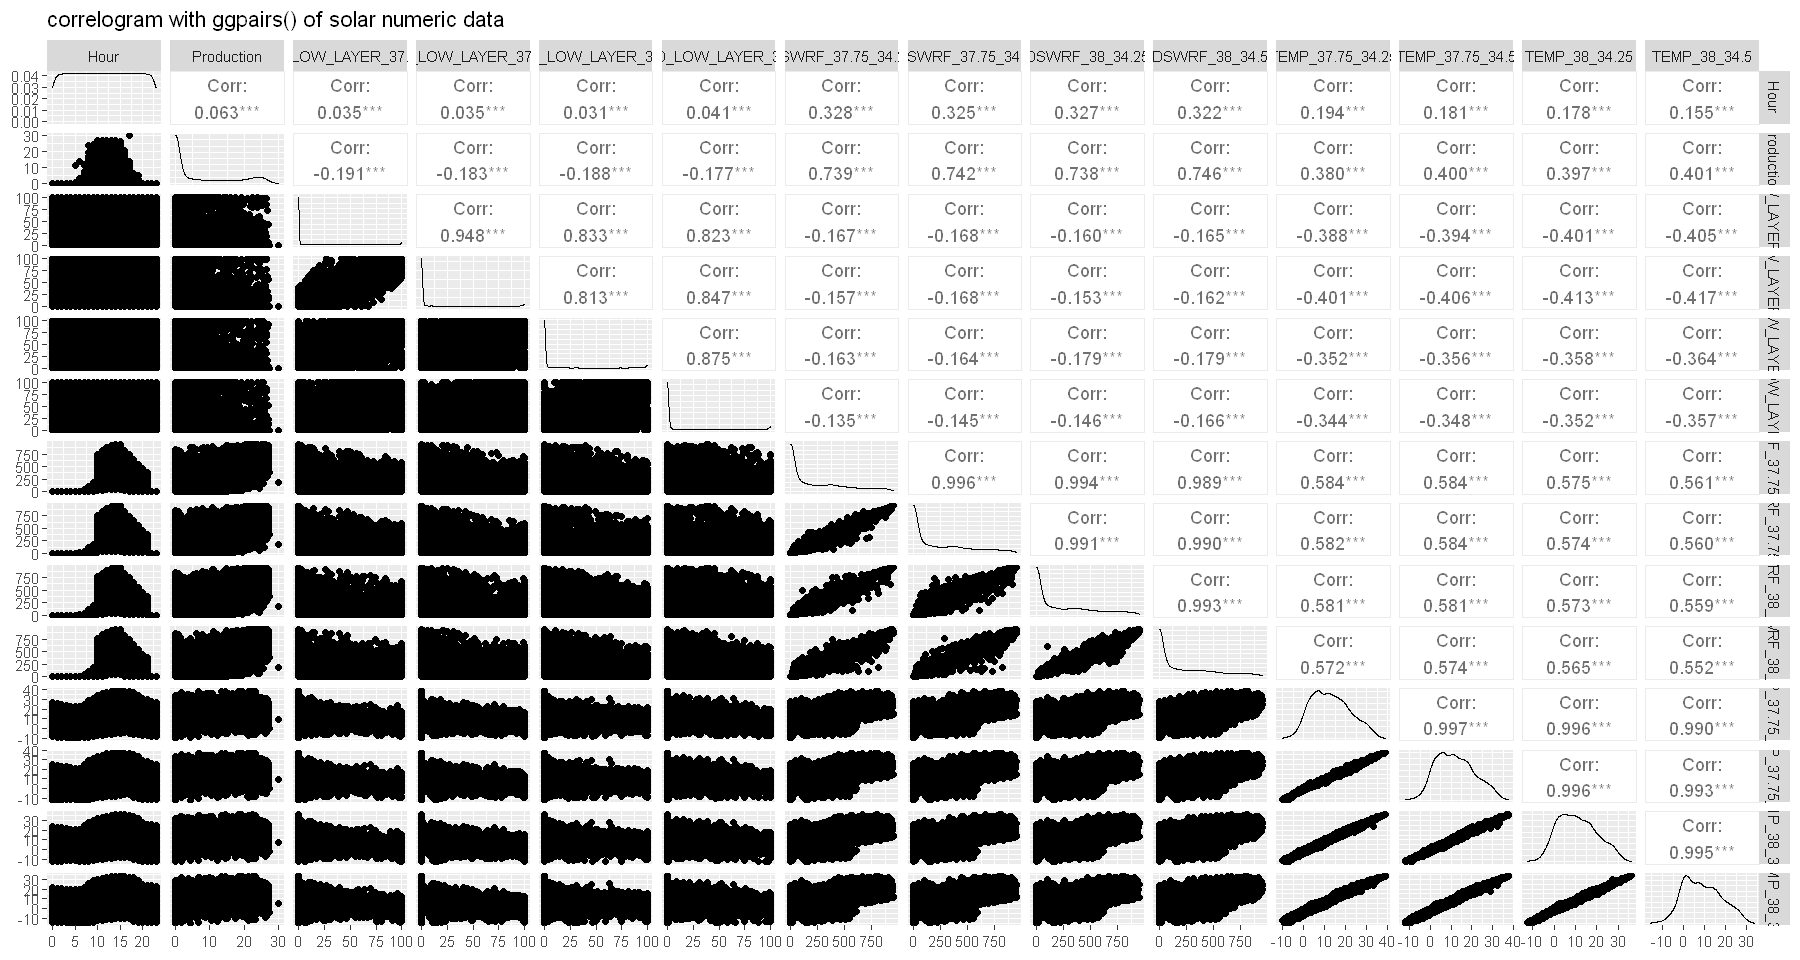

In [15]:
ggpairs(solarnumerics, title="correlogram with ggpairs() of solar numeric data") 

#### Analyzing  Relationships
- Temps are highly correlated in each other.
- Clouds are highly correlated in each other.
- Dswrf's are highly correlated in each other.
- Production have got higher correlations with all other variables

## REMOVING NIGHT HOURS

In [17]:
solar = solar[solar$Hour > 4 | solar$Hour < 20,]

#### We dont need night time data

## FEATURE GENERATION ( LAG, MOVING AVERAGE  by window values[1 hour, 1 day,.. ] 

### TARGET FEATURE
- Production = Next hour electric production 

### FEATURES
- Hour


- Production1hourlag = 1 hour lag value of Production
- Cloud1hourlag = mean row value of CLOUDS with one hour lag
- Dswrf1hourlag = mean row value of DSWRFs  with one hour lag
- Temp1hourlag = mean row value of Temps  with one hour lag

- Production2hourlag = 2 hour lag value of Production
- Cloud2hourlag = mean row value of CLOUDS with two hour lag
- Dswrf2hourlag = mean row value of DSWRFs  with two hour lag
- Temp2hourlag = mean row value of Temps  with one two lag

- Production3hourlag = 3 hour lag value of Production
- Cloud3hourlag = mean row value of CLOUDS with three hour lag
- Dswrf3hourlag = mean row value of DSWRFs  with three hour lag
- Temp3hourlag = mean row value of Temps  with one three lag

- Production24hourlag = 24 hour lag value of Production
- Cloud24hourlag = mean row value of CLOUDS with 24 hour lag
- Dswrf24hourlag = mean row value of DSWRFs  with 24 hour lag
- Temp24hourlag = mean row value of Temps  with one 24 lag

- Production48hourlag = 48 hour lag value of Production
- Cloud48hourlag = mean row value of CLOUDS with 48 hour lag
- Dswrf48hourlag = mean row value of DSWRFs  with 48 hour lag
- Temp48hourlag = mean row value of Temps  with one 48 lag

- Production24hourlag = 24 hour lag value of Production
- Cloud168hourlag = mean row value of CLOUDS with 168 hour lag (one week)
- Dswrf168hourlag = mean row value of DSWRFs  with 168 hour lag  (one week)
- Temp168hourlag = mean row value of Temps  with one 168 lag  (one week)

- Production24hourlag = 24 hour lag value of Production
- Cloud336hourlag = mean row value of CLOUDS with 336 hour lag (two week)
- Dswrf336hourlag = mean row value of DSWRFs  with 336 hour lag  (two week)
- Temp336hourlag = mean row value of Temps  with one 336 lag  (two week)

- Production3hourMA = 3 hour MA value of Production  (MA = Moving Average)
- Cloud3hourMA = mean row value of CLOUDS with three hour MA
- Dswrf3hourMA = mean row value of DSWRFs  with three hour MA
- Temp3hourMA = mean row value of Temps  with one three MA

- Production24hourMA = 24 hour MA value of Production
- Cloud24hourMA = mean row value of CLOUDS with 24 hour MA
- Dswrf24hourMA = mean row value of DSWRFs  with 24 hour MA
- Temp24hourMA = mean row value of Temps  with one 24 MA

- Production48hourMA = 48 hour MA value of Production
- Cloud48hourMA = mean row value of CLOUDS with 48 hour MA
- Dswrf48hourMA = mean row value of DSWRFs  with 48 hour MA
- Temp48hourMA = mean row value of Temps  with one 48 MA

- Production24hourMA = 24 hour MA value of Production
- Cloud168hourMA = mean row value of CLOUDS with 168 hour MA (one week)
- Dswrf168hourMA = mean row value of DSWRFs  with 168 hour MA  (one week)
- Temp168hourMA = mean row value of Temps  with one 168 MA  (one week)

- Production24hourMA = 24 hour MA value of Production
- Cloud336hourMA = mean row value of CLOUDS with 336 hour MA (two week)
- Dswrf336hourMA = mean row value of DSWRFs  with 336 hour MA  (two week)
- Temp336hourMA = mean row value of Temps  with one 336 MA  (two week)

In [84]:
solar$Cloud = (solar$CLOUD_LOW_LAYER_37.75_34.25 + solar$CLOUD_LOW_LAYER_37.75_34.5 + solar$CLOUD_LOW_LAYER_38_34.25 + solar$CLOUD_LOW_LAYER_38_34.5) / 4
solar$Dswrf = (solar$DSWRF_37.75_34.25 + solar$DSWRF_37.75_34.5 + solar$DSWRF_38_34.25 + solar$DSWRF_38_34.5 ) / 4
solar$Temp = (solar$TEMP_37.75_34.25 + solar$TEMP_37.75_34.5 + solar$TEMP_38_34.25 + solar$TEMP_38_34.5 ) / 4
solarnew = solar[,-(4:16)]
head(data.table(solarnew))

Date,Hour,Production,Cloud,Dswrf,Temp
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2019-10-09,0,0,0,0,15.1060
2019-10-09,1,0,0,0,14.6440
2019-10-09,2,0,0,0,13.8560
2019-10-09,3,0,0,0,13.2060
2019-10-09,4,0,0,0,13.0800
2019-10-09,5,0,0,0,12.7435


In [85]:
solarnew$Production1hourlag  = Lag(solarnew$Production, -1)
solarnew$Cloud1hourlag  = Lag(solarnew$Cloud, -1)
solarnew$Dswrf1hourlag  = Lag(solarnew$Dswrf, -1)
solarnew$Temp1hourlag  = Lag(solarnew$Temp, -1)

solarnew$Production1hourlagsquare  = Lag(solarnew$Production, -1)^2
solarnew$Cloud1hourlagsquare  = Lag(solarnew$Cloud, -1)^2
solarnew$Dswrf1hourlagsquare  = Lag(solarnew$Dswrf, -1)^2
solarnew$Temp1hourlagsquare  = Lag(solarnew$Temp, -1)^2

solarnew$Production2hourlag  = Lag(solarnew$Production, -2)
solarnew$Cloud2hourlag  = Lag(solarnew$Cloud, -2)
solarnew$Dswrf2hourlag  = Lag(solarnew$Dswrf, -2)
solarnew$Temp2hourlag  = Lag(solarnew$Temp, -2)

solarnew$Production3hourlag  = Lag(solarnew$Production, -3)
solarnew$Cloud3hourlag  = Lag(solarnew$Cloud, -3)
solarnew$Dswrf3hourlag  = Lag(solarnew$Dswrf, -3)
solarnew$Temp3hourlag  = Lag(solarnew$Temp, -3)

solarnew$Production24hourlag  = Lag(solarnew$Production, -24)
solarnew$Cloud24hourlag  = Lag(solarnew$Cloud, -24)
solarnew$Dswrf24hourlag  = Lag(solarnew$Dswrf, -24)
solarnew$Temp24hourlag  = Lag(solarnew$Temp, -24)

solarnew$Production48hourlag  = Lag(solarnew$Production, -48)
solarnew$Cloud48hourlag  = Lag(solarnew$Cloud, -48)
solarnew$Dswrf48hourlag  = Lag(solarnew$Dswrf, -48)
solarnew$Temp48hourlag  = Lag(solarnew$Temp, -48)

solarnew$Production168hourlag  = Lag(solarnew$Production, -168)
solarnew$Cloud168hourlag  = Lag(solarnew$Cloud, -168)
solarnew$Dswrf168hourlag  = Lag(solarnew$Temp, -168)
solarnew$Temp168hourlag  = Lag(solarnew$Temp, -168)

solarnew$Production336hourlag  = Lag(solarnew$Production, -336)
solarnew$Cloud336hourlag  = Lag(solarnew$Cloud, -336)
solarnew$Dswrf336hourlag  = Lag(solarnew$Dswrf, -336)
solarnew$Temp336hourlag  = Lag(solarnew$Temp, -336) 


solarnew$Production3hourMA  = rollmean(solarnew$Temp, 3,na.pad = T, align = "right")
solarnew$Cloud3hourMA  = rollmean(solarnew$Temp, 3,na.pad = T, align = "right")
solarnew$Dswrf3hourMA  = rollmean(solarnew$Temp, 3,na.pad = T, align = "right")
solarnew$Temp3hourMA  = rollmean(solarnew$Temp, 3,na.pad = T, align = "right")

solarnew$Production24hourMA  = rollmean(solarnew$Temp, 24,na.pad = T, align = "right")
solarnew$Cloud24hourMA  = rollmean(solarnew$Temp, 24,na.pad = T, align = "right")
solarnew$Dswrf24hourMA  = rollmean(solarnew$Temp, 24,na.pad = T, align = "right")
solarnew$Temp24hourMA  = rollmean(solarnew$Temp, 24,na.pad = T, align = "right")

solarnew$Production48hourMA  = rollmean(solarnew$Temp, 48,na.pad = T, align = "right")
solarnew$Cloud48hourMA  = rollmean(solarnew$Temp, 48,na.pad = T, align = "right")
solarnew$Dswrf48hourMA  = rollmean(solarnew$Temp, 48,na.pad = T, align = "right")
solarnew$Temp48hourMA  = rollmean(solarnew$Temp, 48,na.pad = T, align = "right")

solarnew$Production168hourMA  = rollmean(solarnew$Temp, 168,na.pad = T, align = "right")
solarnew$Cloud168hourMA  = rollmean(solarnew$Temp, 168,na.pad = T, align = "right")
solarnew$Dswrf168hourMA  = rollmean(solarnew$Temp, 168,na.pad = T, align = "right")
solarnew$Temp168hourMA  = rollmean(solarnew$Temp, 168,na.pad = T, align = "right")

solarnew$Production336hourMA  = rollmean(solarnew$Temp, 336,na.pad = T, align = "right")
solarnew$Cloud336hourMA  = rollmean(solarnew$Temp, 336,na.pad = T, align = "right")
solarnew$Dswrf336hourMA  = rollmean(solarnew$Temp, 336,na.pad = T, align = "right")
solarnew$Temp336hourMA  = rollmean(solarnew$Temp, 336,na.pad = T, align = "right")

solarnew = solarnew[complete.cases(solarnew), ]

head(data.table(solarnew))

Date,Hour,Production,Cloud,Dswrf,Temp,Production1hourlag,Cloud1hourlag,Dswrf1hourlag,Temp1hourlag,...,Dswrf48hourMA,Temp48hourMA,Production168hourMA,Cloud168hourMA,Dswrf168hourMA,Temp168hourMA,Production336hourMA,Cloud336hourMA,Dswrf336hourMA,Temp336hourMA
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-10-22,23,0,0.50,0,12.6150,0,0.25,0,12.2170,...,13.72701,13.72701,16.06691,16.06691,16.06691,16.06691,16.92155,16.92155,16.92155,16.92155
2019-10-23,0,0,0.25,0,12.2170,0,0.25,0,11.8390,...,13.73013,13.73013,16.04199,16.04199,16.04199,16.04199,16.91295,16.91295,16.91295,16.91295
2019-10-23,1,0,0.25,0,11.8390,0,0.25,0,11.4490,...,13.73622,13.73622,16.01917,16.01917,16.01917,16.01917,16.90460,16.90460,16.90460,16.90460
2019-10-23,2,0,0.25,0,11.4490,0,0.00,0,11.1300,...,13.74200,13.74200,15.99688,15.99688,15.99688,15.99688,16.89744,16.89744,16.89744,16.89744
2019-10-23,3,0,0.00,0,11.1300,0,0.00,0,10.7385,...,13.74489,13.74489,15.97372,15.97372,15.97372,15.97372,16.89126,16.89126,16.89126,16.89126
2019-10-23,4,0,0.00,0,10.7385,0,0.00,0,10.2350,...,13.74281,13.74281,15.94800,15.94800,15.94800,15.94800,16.88429,16.88429,16.88429,16.88429


In [86]:
skim(solarnew)

-- Data Summary ------------------------
                           Values  
Name                       solarnew
Number of rows             10921   
Number of columns          58      
_______________________            
Column type frequency:             
  character                1       
  numeric                  57      
________________________           
Group variables            None    

-- Variable type: character ----------------------------------------------------
# A tibble: 1 x 8
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
* <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
1 Date                  0             1    10    10     0      456          0

-- Variable type: numeric ------------------------------------------------------
# A tibble: 57 x 11
   skim_variable            n_missing complete_rate      mean        sd
 * <chr>                        <int>         <dbl>     <dbl>     <dbl>
 1 Hour            

### Train Test Split
We select Nearer one month as test data and backward others are train

In [71]:
solarnew = solarnew[,-c(1,4,5,6)]
solartrain =  solarnew[1:(nrow(solarnew)-(7*24+1)),]
solartest =  solarnew[(nrow(solarnew)-(7*24)):nrow(solarnew),]
head(data.table(solartrain))

Hour,Production,Production1hourlag,Cloud1hourlag,Dswrf1hourlag,Temp1hourlag,Production1hourlagsquare,Cloud1hourlagsquare,Dswrf1hourlagsquare,Temp1hourlagsquare,...,Dswrf48hourMA,Temp48hourMA,Production168hourMA,Cloud168hourMA,Dswrf168hourMA,Temp168hourMA,Production336hourMA,Cloud336hourMA,Dswrf336hourMA,Temp336hourMA
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,0,0,0.25,0,12.2170,0,0.0625,0,149.2551,...,13.72701,13.72701,16.06691,16.06691,16.06691,16.06691,16.92155,16.92155,16.92155,16.92155
0,0,0,0.25,0,11.8390,0,0.0625,0,140.1619,...,13.73013,13.73013,16.04199,16.04199,16.04199,16.04199,16.91295,16.91295,16.91295,16.91295
1,0,0,0.25,0,11.4490,0,0.0625,0,131.0796,...,13.73622,13.73622,16.01917,16.01917,16.01917,16.01917,16.90460,16.90460,16.90460,16.90460
2,0,0,0.00,0,11.1300,0,0.0000,0,123.8769,...,13.74200,13.74200,15.99688,15.99688,15.99688,15.99688,16.89744,16.89744,16.89744,16.89744
3,0,0,0.00,0,10.7385,0,0.0000,0,115.3154,...,13.74489,13.74489,15.97372,15.97372,15.97372,15.97372,16.89126,16.89126,16.89126,16.89126
4,0,0,0.00,0,10.2350,0,0.0000,0,104.7552,...,13.74281,13.74281,15.94800,15.94800,15.94800,15.94800,16.88429,16.88429,16.88429,16.88429



Call:
lm(formula = Production ~ ., data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.9144  -0.7491  -0.0601   0.7513  28.8350 

Coefficients: (16 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               9.849e-01  8.773e-02  11.226  < 2e-16 ***
Hour                     -3.634e-02  3.914e-03  -9.285  < 2e-16 ***
Production1hourlag        7.915e-01  1.756e-02  45.068  < 2e-16 ***
Cloud1hourlag            -1.401e-02  4.162e-03  -3.367 0.000763 ***
Dswrf1hourlag             4.383e-03  4.839e-04   9.058  < 2e-16 ***
Temp1hourlag              6.013e-01  4.499e-02  13.365  < 2e-16 ***
Production1hourlagsquare  6.593e-04  5.452e-04   1.209 0.226554    
Cloud1hourlagsquare       1.717e-04  3.450e-05   4.977 6.55e-07 ***
Dswrf1hourlagsquare       2.035e-06  4.388e-07   4.638 3.56e-06 ***
Temp1hourlagsquare       -2.585e-03  2.766e-04  -9.346  < 2e-16 ***
Production2hourlag       -2.058e-01 

Warning message in predict.lm(model1, solartest):
"prediction from a rank-deficient fit may be misleading"


      Hour realTestProduction predictionTestProduction
11088   23               0.00                0.4537665
11089    0               0.00                1.0825331
11090    1               0.00                1.0080218
11091    2               0.00                0.8929210
11092    3               0.00                0.7687038
11093    4               0.00                0.7973970
11094    5               0.00                0.8063611
11095    6               0.00                0.6024740
11096    7               0.00               -0.2813054
11097    8               0.15                0.5456182
11098    9               1.51                2.5556999
11099   10               1.92                4.6360397
11100   11               1.96                7.3114168
11101   12               2.68                8.2109841
11102   13               5.21                4.2577229
11103   14               0.60                2.6936374
11104   15               0.15                1.0327599
11105   16

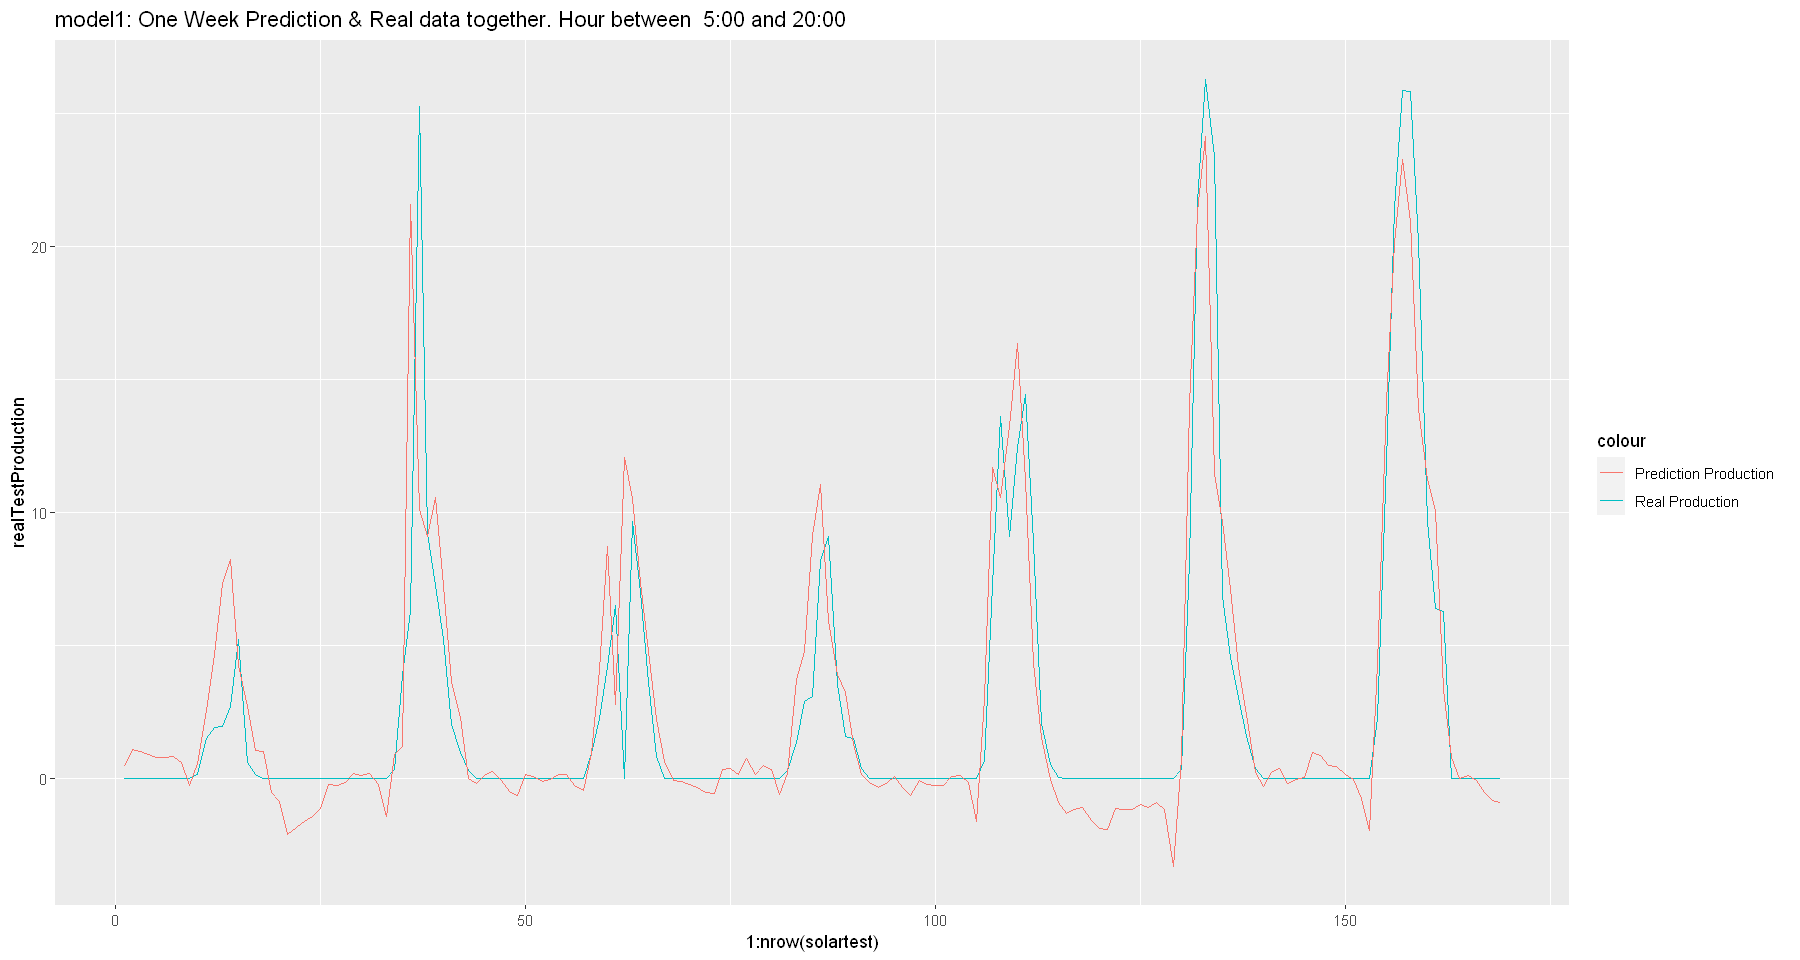

In [87]:
model1<-lm(Production ~ . ,data = solartrain)
print(summary(model1))

predictnear30daystestdata = predict(model1, solartest)

model1testrealpandpredict = data.frame(Hour = solartest$Hour, realTestProduction=solartest$Production, predictionTestProduction=predictnear30daystestdata)
print(head(model1testrealpandpredict,24))

forecast = 1+model1testrealpandpredict$predictionTestProduction # 1 added to formula because 0 division produce Infine
actual = 1+model1testrealpandpredict$realTestProduction
MAPEModel1 = sum(abs((actual-forecast)/actual))*100/length(actual)
print("MAPE Value of model1")
print(MAPEModel1)

ggplot(model1testrealpandpredict, aes(1:nrow(solartest))) + 
  geom_line(aes(y = realTestProduction, colour = "Real Production")) + 
  geom_line(aes(y = predictionTestProduction, colour = "Prediction Production")) +
  ggtitle("model1: One Week Prediction & Real data together. Hour between  5:00 and 20:00")


Call:
lm(formula = Production ~ Production1hourlag + Cloud1hourlag + 
    Dswrf1hourlag + Temp1hourlag, data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.5642  -1.2050   0.2006   0.6884  28.6492 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0522886  0.0527064  -0.992    0.321    
Production1hourlag  0.6267220  0.0043583 143.799   <2e-16 ***
Cloud1hourlag      -0.0047854  0.0010062  -4.756    2e-06 ***
Dswrf1hourlag       0.0136468  0.0001641  83.161   <2e-16 ***
Temp1hourlag       -0.0390749  0.0038576 -10.129   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.697 on 10747 degrees of freedom
Multiple R-squared:  0.9114,	Adjusted R-squared:  0.9114 
F-statistic: 2.764e+04 on 4 and 10747 DF,  p-value: < 2.2e-16

      Hour realTestProduction predictionTestProduction
11088   23               0.00              -0.45014901
11089    0               0.

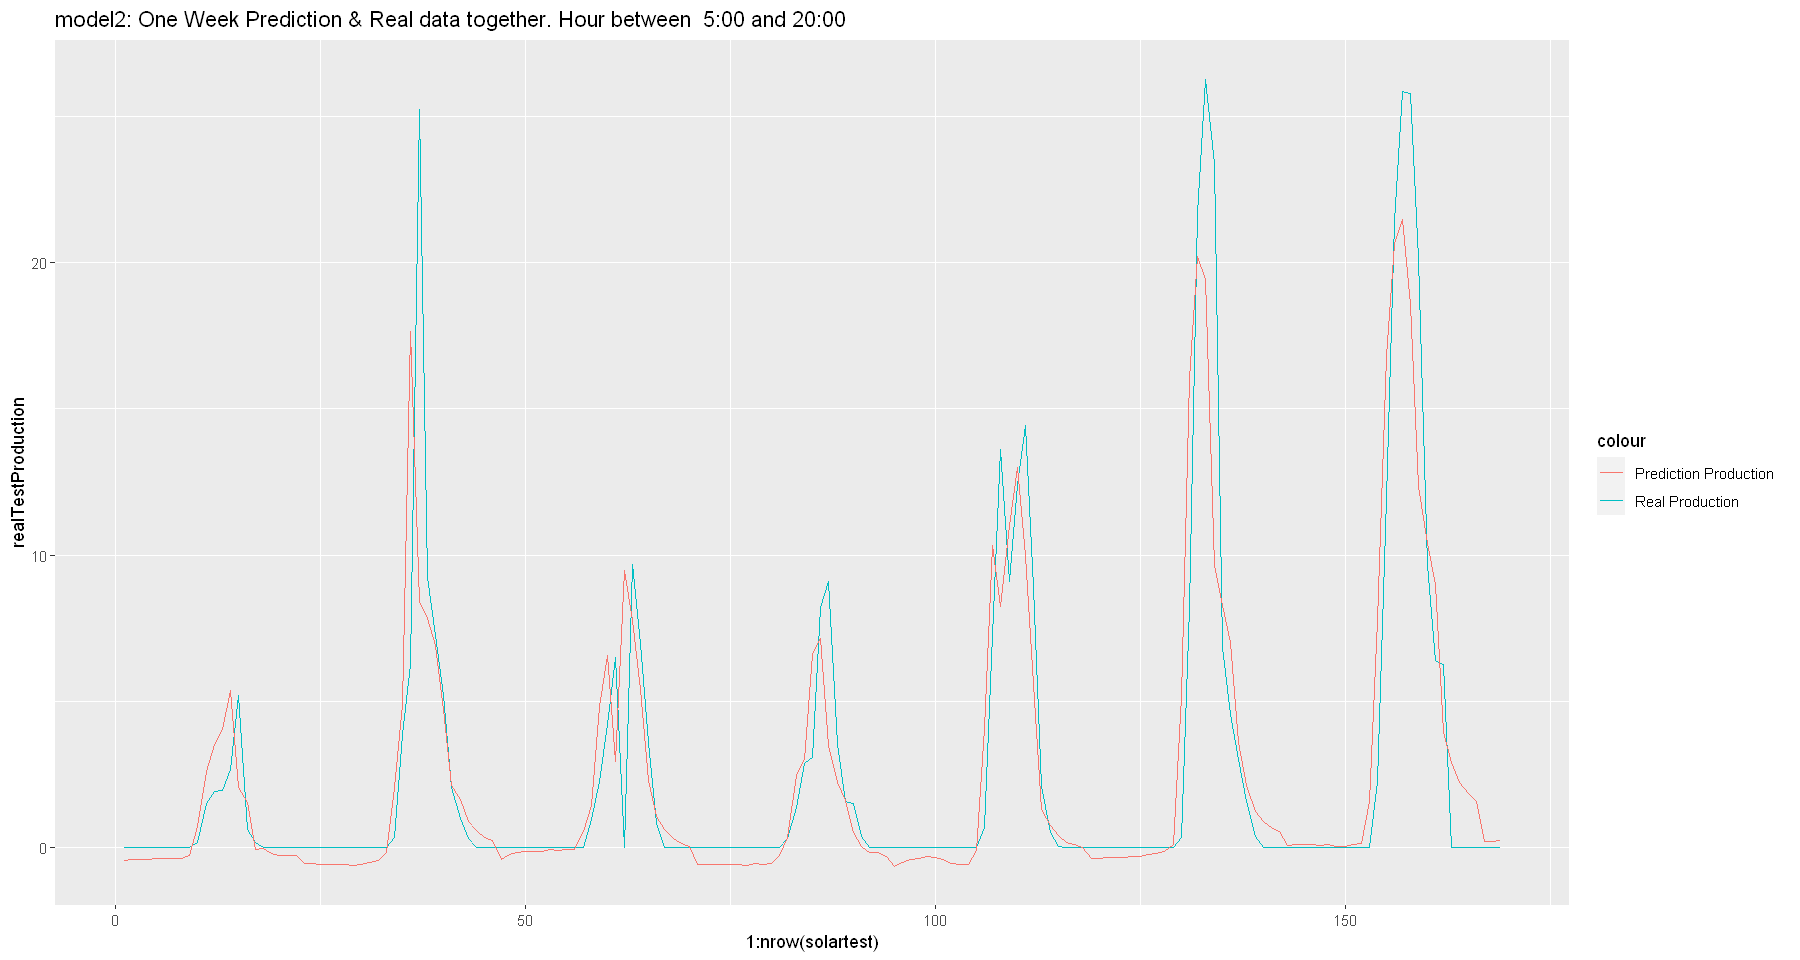

In [88]:
model2<-lm(Production ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag ,data = solartrain)
print(summary(model2))

predictnear30daystestdata = predict(model2, solartest)

model2testrealpandpredict = data.frame(Hour = solartest$Hour, realTestProduction=solartest$Production, predictionTestProduction=predictnear30daystestdata)
print(head(model2testrealpandpredict,24))

forecast = 1+model2testrealpandpredict$predictionTestProduction # 1 added to formula because 0 division produce Infine
actual = 1+model2testrealpandpredict$realTestProduction
MAPEModel2 = sum(abs((actual-forecast)/actual))*100/length(actual)
print("MAPE Value of Model2")
print(MAPEModel2)

ggplot(model2testrealpandpredict, aes(1:nrow(solartest))) + 
  geom_line(aes(y = realTestProduction, colour = "Real Production")) + 
  geom_line(aes(y = predictionTestProduction, colour = "Prediction Production")) +
  ggtitle("model2: One Week Prediction & Real data together. Hour between  5:00 and 20:00")


Call:
lm(formula = Production ~ Production1hourlag + Cloud1hourlag + 
    Dswrf1hourlag + Temp1hourlag + Production2hourlag + Cloud2hourlag + 
    Dswrf2hourlag + Temp2hourlag, data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9737  -0.8534  -0.0171   0.5236  28.5483 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.2291469  0.0488421   4.692 2.74e-06 ***
Production1hourlag  1.0186059  0.0091029 111.899  < 2e-16 ***
Cloud1hourlag      -0.0008407  0.0031009  -0.271   0.7863    
Dswrf1hourlag       0.0101998  0.0002878  35.438  < 2e-16 ***
Temp1hourlag        0.2597296  0.0296401   8.763  < 2e-16 ***
Production2hourlag -0.3172616  0.0087614 -36.211  < 2e-16 ***
Cloud2hourlag      -0.0053274  0.0030934  -1.722   0.0851 .  
Dswrf2hourlag      -0.0004719  0.0003354  -1.407   0.1595    
Temp2hourlag       -0.2893387  0.0298053  -9.708  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' '

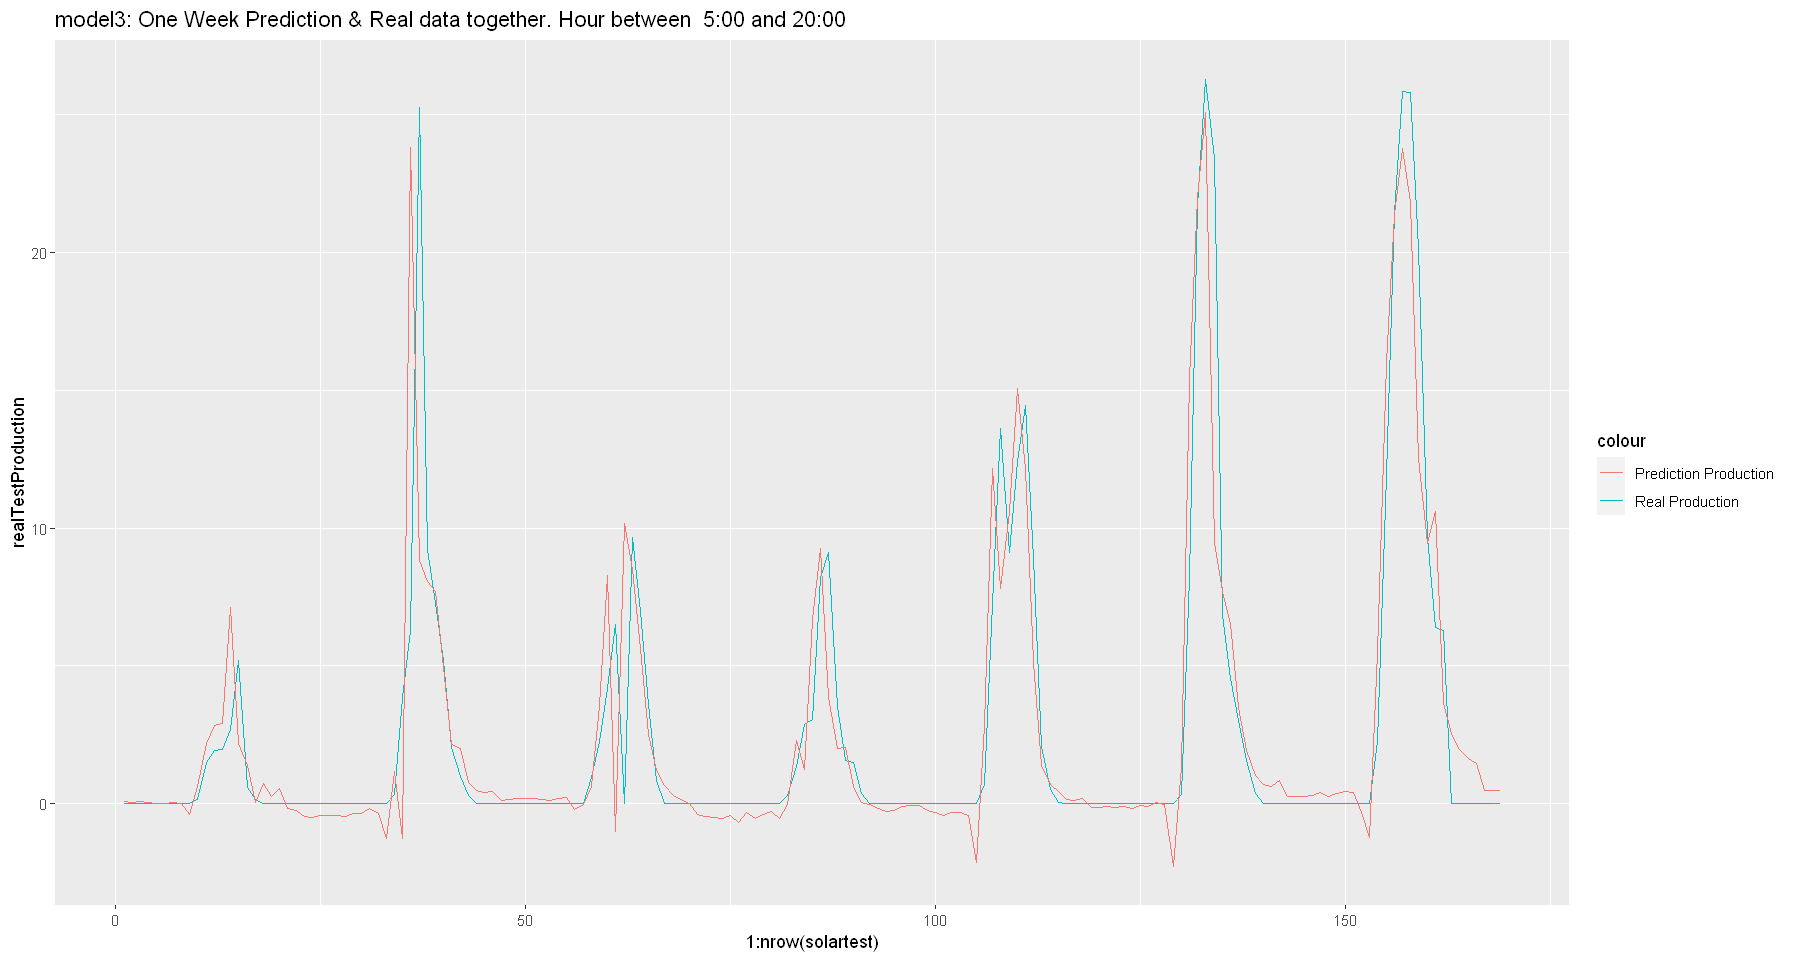

In [89]:
model3<-lm(Production ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag +
                        Production2hourlag + Cloud2hourlag + Dswrf2hourlag + Temp2hourlag
           ,data = solartrain)
print(summary(model3))

predictnear30daystestdata = predict(model3, solartest)

model3testrealpandpredict = data.frame(Hour = solartest$Hour, realTestProduction=solartest$Production, predictionTestProduction=predictnear30daystestdata)
print(head(model3testrealpandpredict,24))

forecast = 1+model3testrealpandpredict$predictionTestProduction # 1 added to formula because 0 division produce Infine
actual = 1+model3testrealpandpredict$realTestProduction
MAPEModel3 = sum(abs((actual-forecast)/actual))*100/length(actual)
print("MAPE Value of model3")
print(MAPEModel3)

ggplot(model3testrealpandpredict, aes(1:nrow(solartest))) + 
  geom_line(aes(y = realTestProduction, colour = "Real Production")) + 
  geom_line(aes(y = predictionTestProduction, colour = "Prediction Production")) +
  ggtitle("model3: One Week Prediction & Real data together. Hour between  5:00 and 20:00")


Call:
lm(formula = Production ~ Production1hourlag + Cloud1hourlag + 
    Dswrf1hourlag + Temp1hourlag + Production24hourlag + Cloud24hourlag + 
    Dswrf24hourlag + Temp24hourlag + Production48hourlag + Cloud48hourlag + 
    Dswrf48hourlag + Temp48hourlag + Production168hourlag + Cloud168hourlag + 
    Dswrf168hourlag + Temp168hourlag, data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.0337  -1.0059   0.0967   0.8554  29.0265 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0679990  0.0659379  -1.031 0.302443    
Production1hourlag    0.5399824  0.0063041  85.656  < 2e-16 ***
Cloud1hourlag        -0.0134687  0.0010431 -12.913  < 2e-16 ***
Dswrf1hourlag         0.0052712  0.0003238  16.277  < 2e-16 ***
Temp1hourlag         -0.0288642  0.0110118  -2.621 0.008774 ** 
Production24hourlag   0.1445986  0.0078634  18.389  < 2e-16 ***
Cloud24hourlag        0.0025281  

Warning message in predict.lm(model4, solartest):
"prediction from a rank-deficient fit may be misleading"


      Hour realTestProduction predictionTestProduction
11088   23               0.00               0.47934760
11089    0               0.00               0.52095718
11090    1               0.00               0.54451069
11091    2               0.00               0.59337828
11092    3               0.00               0.64824400
11093    4               0.00               0.64575979
11094    5               0.00               0.62052909
11095    6               0.00               0.61221843
11096    7               0.00               0.63174131
11097    8               0.15               1.61654441
11098    9               1.51               3.45931032
11099   10               1.92               5.46903862
11100   11               1.96               9.02700113
11101   12               2.68               7.73076688
11102   13               5.21               5.22315971
11103   14               0.60               4.32193578
11104   15               0.15               1.83051713
11105   16

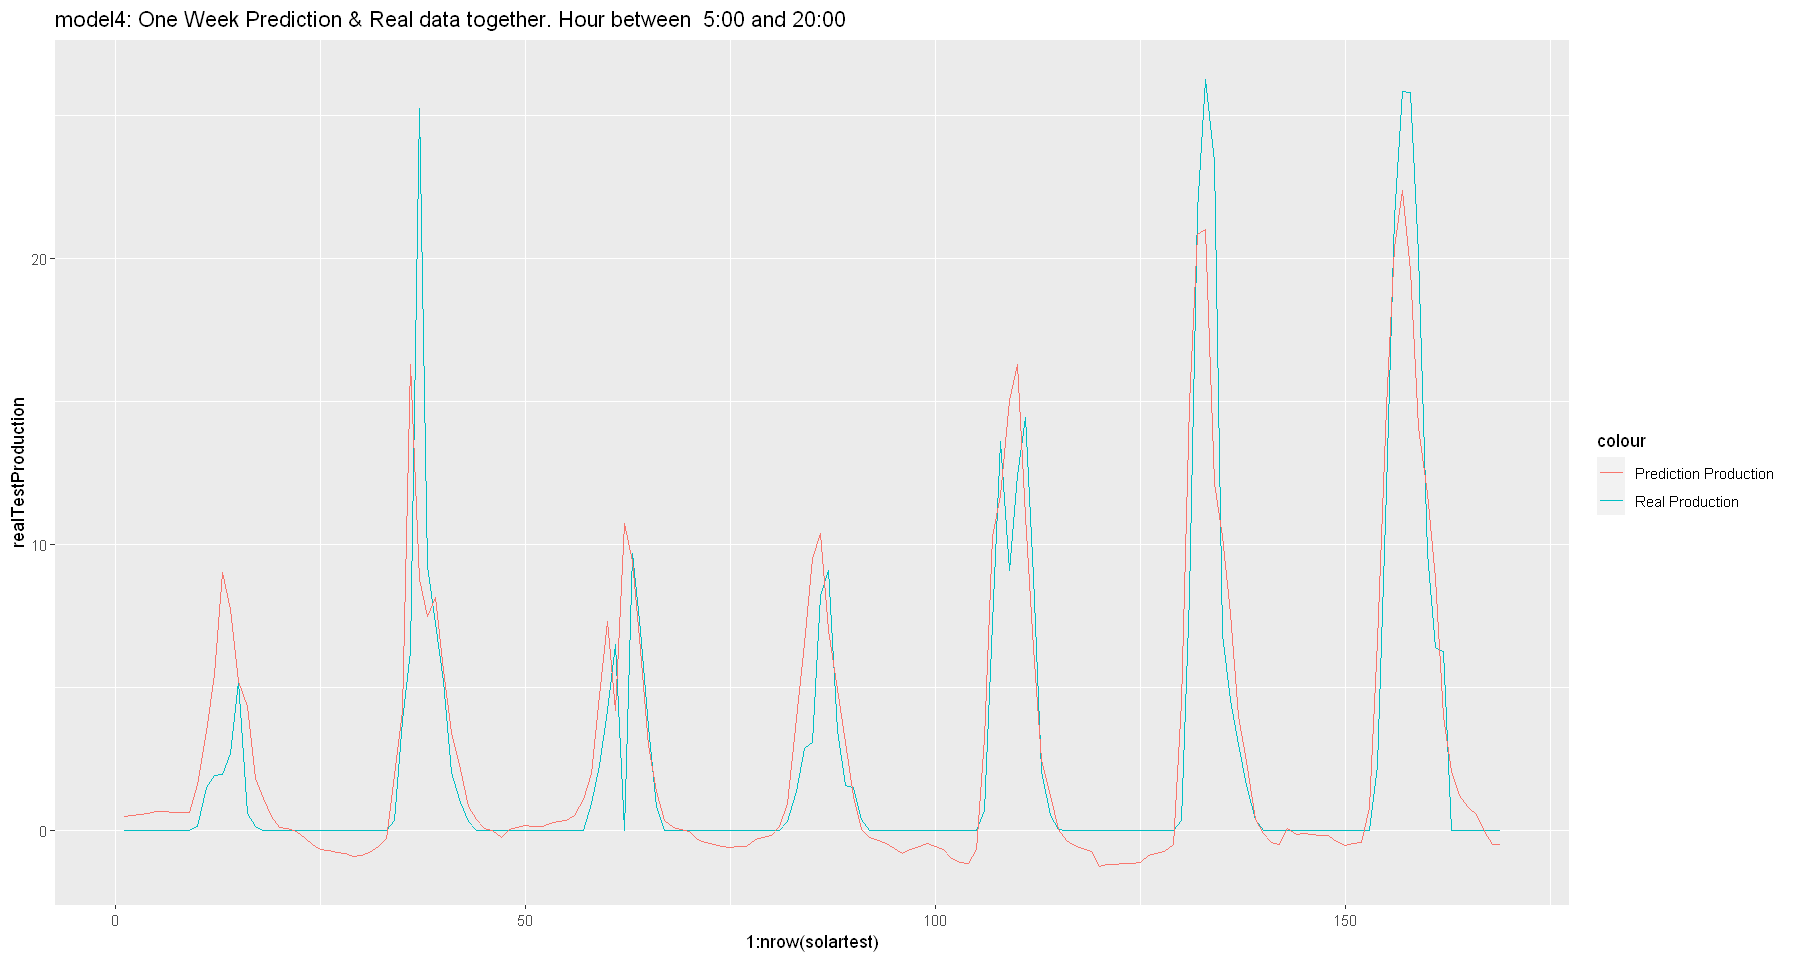

In [90]:
model4<-lm(Production ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag +
                        Production24hourlag + Cloud24hourlag + Dswrf24hourlag + Temp24hourlag +
                        Production48hourlag + Cloud48hourlag + Dswrf48hourlag + Temp48hourlag +
                        Production168hourlag + Cloud168hourlag + Dswrf168hourlag + Temp168hourlag 
           ,data = solartrain)
print(summary(model4))

predictnear30daystestdata = predict(model4, solartest)

model4testrealpandpredict = data.frame(Hour = solartest$Hour, realTestProduction=solartest$Production, predictionTestProduction=predictnear30daystestdata)
print(head(model4testrealpandpredict,24))

forecast = 1+model4testrealpandpredict$predictionTestProduction # 1 added to formula because 0 division produce Infine
actual = 1+model4testrealpandpredict$realTestProduction
MAPEModel4 = sum(abs((actual-forecast)/actual))*100/length(actual)
print("MAPE Value of model4")
print(MAPEModel4)

ggplot(model4testrealpandpredict, aes(1:nrow(solartest))) + 
  geom_line(aes(y = realTestProduction, colour = "Real Production")) + 
  geom_line(aes(y = predictionTestProduction, colour = "Prediction Production")) +
  ggtitle("model4: One Week Prediction & Real data together. Hour between  5:00 and 20:00")


Call:
lm(formula = Production ~ Production1hourlag + Cloud1hourlag + 
    Dswrf1hourlag + Temp1hourlag + Production3hourMA + Cloud3hourMA + 
    Dswrf3hourMA + Temp3hourMA + Production48hourlag + Cloud48hourlag + 
    Dswrf48hourlag + Temp48hourlag + Production168hourlag + Cloud168hourlag + 
    Dswrf168hourlag + Temp168hourlag, data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.0611  -1.1167   0.1292   0.8290  28.5969 

Coefficients: (4 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.2270291  0.0668958  -3.394 0.000692 ***
Production1hourlag    0.6058328  0.0069794  86.803  < 2e-16 ***
Cloud1hourlag        -0.0125423  0.0010233 -12.257  < 2e-16 ***
Dswrf1hourlag         0.0062438  0.0003195  19.540  < 2e-16 ***
Temp1hourlag         -0.1773653  0.0222951  -7.955 1.97e-15 ***
Production3hourMA     0.1899777  0.0222090   8.554  < 2e-16 ***
Cloud3hourMA                 NA         N

Warning message in predict.lm(model5, solartest):
"prediction from a rank-deficient fit may be misleading"


      Hour realTestProduction predictionTestProduction
11088   23               0.00                0.5858696
11089    0               0.00                0.6104424
11090    1               0.00                0.5900628
11091    2               0.00                0.6030832
11092    3               0.00                0.6032740
11093    4               0.00                0.5124171
11094    5               0.00                0.5042381
11095    6               0.00                0.5266147
11096    7               0.00                0.6226640
11097    8               0.15                1.7586500
11098    9               1.51                3.4124502
11099   10               1.92                5.3851268
11100   11               1.96                6.5854387
11101   12               2.68                7.4793188
11102   13               5.21                5.7488089
11103   14               0.60                4.8708776
11104   15               0.15                2.0488224
11105   16

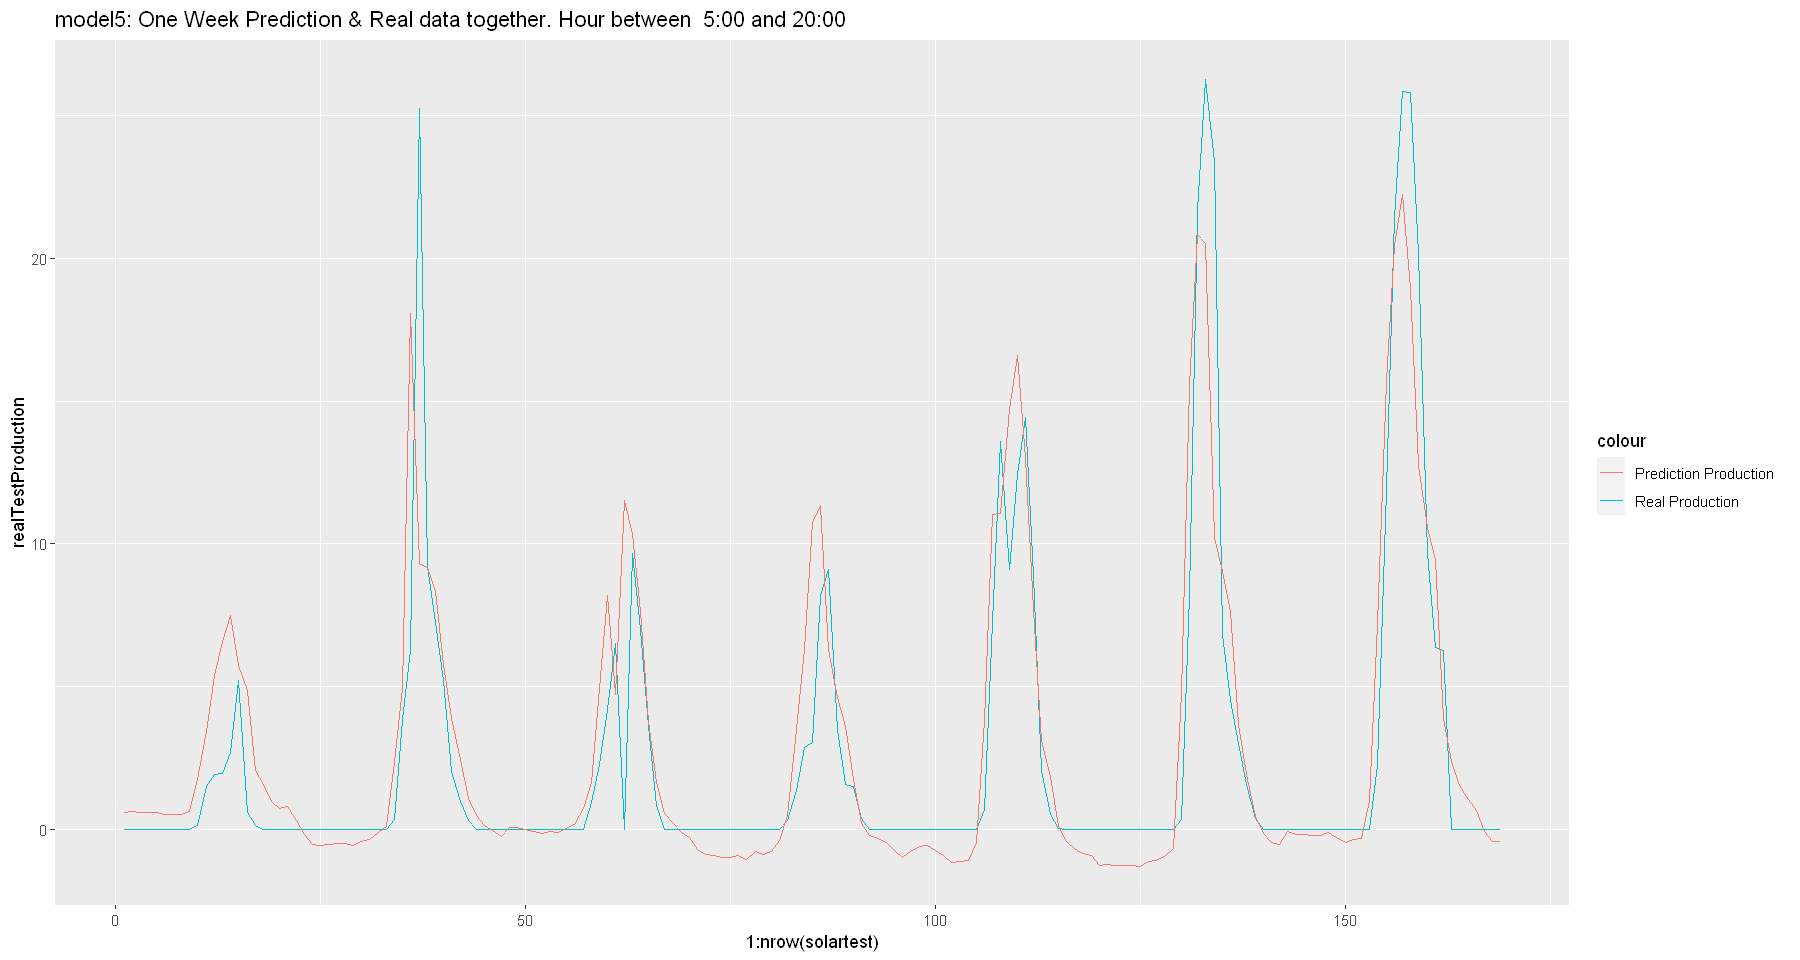

In [91]:
model5<-lm(Production ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag +
                        Production3hourMA + Cloud3hourMA + Dswrf3hourMA + Temp3hourMA +
                        Production48hourlag + Cloud48hourlag + Dswrf48hourlag + Temp48hourlag +
                        Production168hourlag + Cloud168hourlag + Dswrf168hourlag + Temp168hourlag 
           ,data = solartrain)
print(summary(model5))

predictnear30daystestdata = predict(model5, solartest)

model5testrealpandpredict = data.frame(Hour = solartest$Hour, realTestProduction=solartest$Production, predictionTestProduction=predictnear30daystestdata)
print(head(model5testrealpandpredict,24))

forecast = 1+model5testrealpandpredict$predictionTestProduction # 1 added to formula because 0 division produce Infine
actual = 1+model5testrealpandpredict$realTestProduction
MAPEModel5 = sum(abs((actual-forecast)/actual))*100/length(actual)
print("MAPE Value of model5")
print(MAPEModel5)

ggplot(model5testrealpandpredict, aes(1:nrow(solartest))) + 
  geom_line(aes(y = realTestProduction, colour = "Real Production")) + 
  geom_line(aes(y = predictionTestProduction, colour = "Prediction Production")) +
  ggtitle("model5: One Week Prediction & Real data together. Hour between  5:00 and 20:00")


Call:
lm(formula = Production ~ Production1hourlag + Cloud1hourlag + 
    Dswrf1hourlag + Temp1hourlag + Production3hourMA + Cloud3hourMA + 
    Dswrf3hourMA + Temp3hourMA, data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.5573  -1.2188   0.2203   0.6712  28.4885 

Coefficients: (3 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.1163510  0.0558526  -2.083 0.037258 *  
Production1hourlag  0.6446772  0.0067843  95.024  < 2e-16 ***
Cloud1hourlag      -0.0043698  0.0010128  -4.314 1.61e-05 ***
Dswrf1hourlag       0.0134159  0.0001771  75.740  < 2e-16 ***
Temp1hourlag       -0.1135242  0.0219077  -5.182 2.24e-07 ***
Production3hourMA   0.0739777  0.0214291   3.452 0.000558 ***
Cloud3hourMA               NA         NA      NA       NA    
Dswrf3hourMA               NA         NA      NA       NA    
Temp3hourMA                NA         NA      NA       NA    
---
Signif. codes:  0 '***'

Warning message in predict.lm(model6, solartest):
"prediction from a rank-deficient fit may be misleading"


      Hour realTestProduction predictionTestProduction
11088   23               0.00             -0.482924877
11089    0               0.00             -0.432542647
11090    1               0.00             -0.422613522
11091    2               0.00             -0.411521549
11092    3               0.00             -0.405454872
11093    4               0.00             -0.425027375
11094    5               0.00             -0.433837573
11095    6               0.00             -0.416930510
11096    7               0.00             -0.300988781
11097    8               0.15              0.676277853
11098    9               1.51              2.447861883
11099   10               1.92              3.291481809
11100   11               1.96              3.849651077
11101   12               2.68              5.315229953
11102   13               5.21              2.081016370
11103   14               0.60              1.624965548
11104   15               0.15             -0.006566263
11105   16

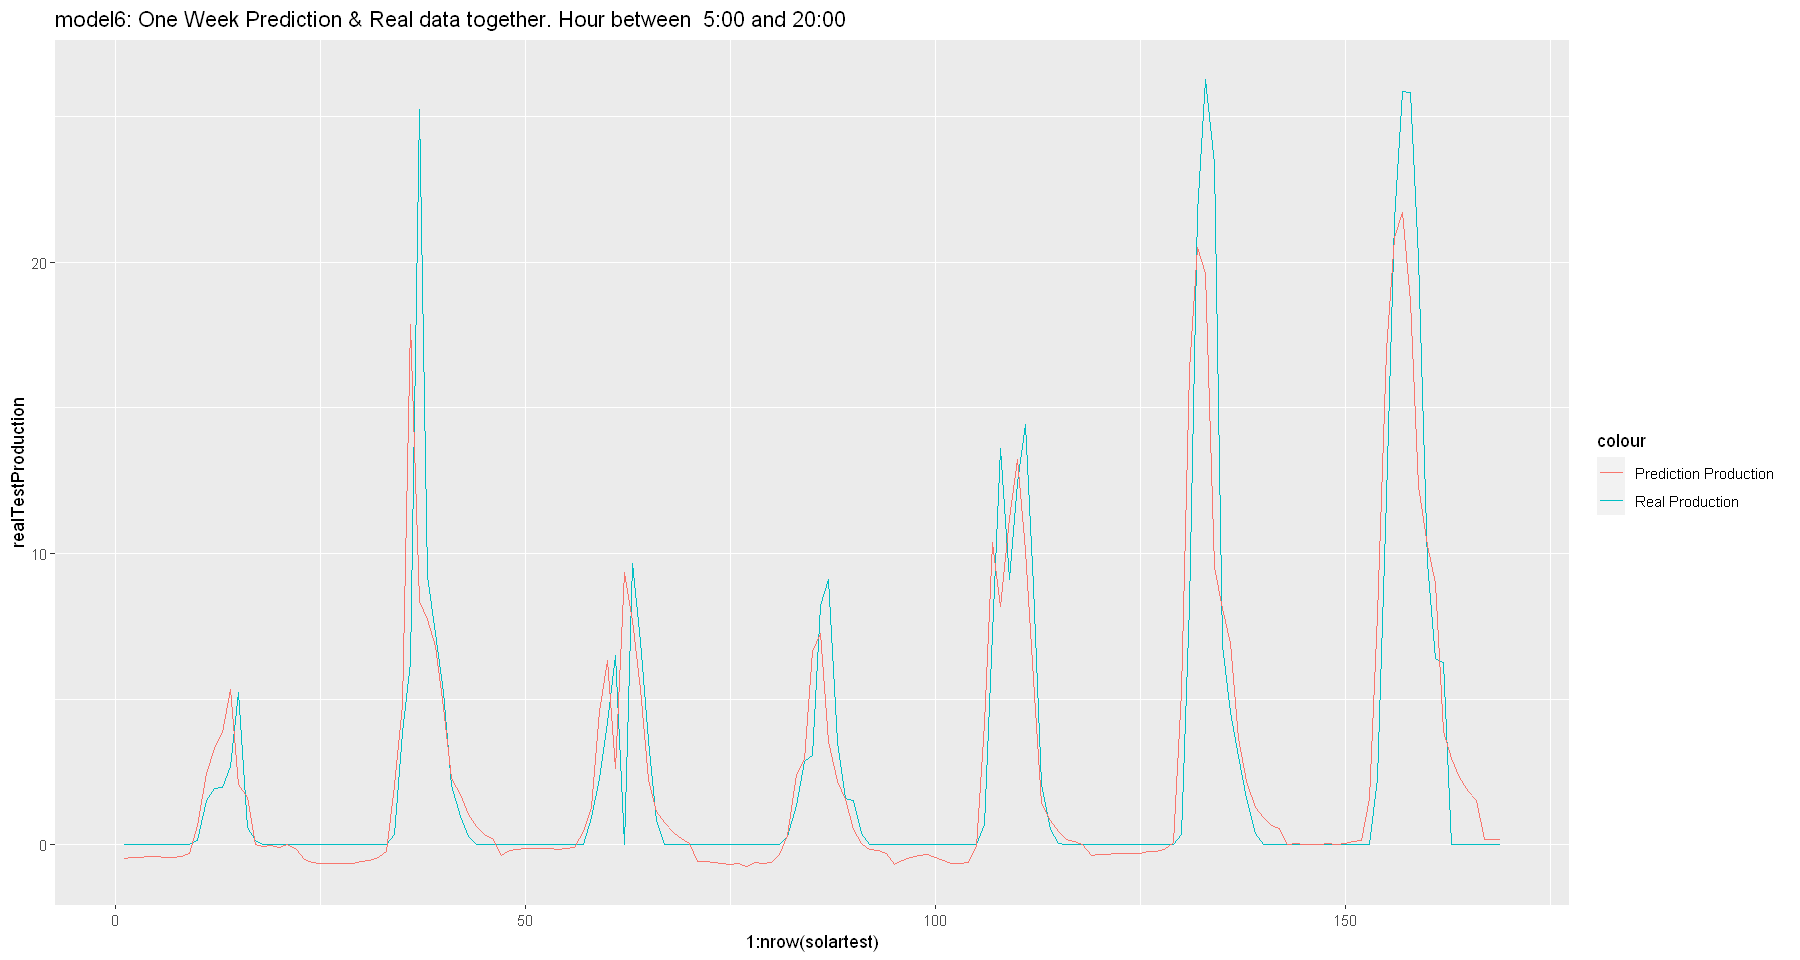

In [92]:
model6<-lm(Production ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag +
                        Production3hourMA + Cloud3hourMA + Dswrf3hourMA + Temp3hourMA 
           ,data = solartrain)
print(summary(model6))

predictnear30daystestdata = predict(model6, solartest)

model6testrealpandpredict = data.frame(Hour = solartest$Hour, realTestProduction=solartest$Production, predictionTestProduction=predictnear30daystestdata)
print(head(model6testrealpandpredict,24))

forecast = 1+model6testrealpandpredict$predictionTestProduction # 1 added to formula because 0 division produce Infine
actual = 1+model6testrealpandpredict$realTestProduction
MAPEModel6 = sum(abs((actual-forecast)/actual))*100/length(actual)
print("MAPE Value of model6")
print(MAPEModel6)

ggplot(model6testrealpandpredict, aes(1:nrow(solartest))) + 
  geom_line(aes(y = realTestProduction, colour = "Real Production")) + 
  geom_line(aes(y = predictionTestProduction, colour = "Prediction Production")) +
  ggtitle("model6: One Week Prediction & Real data together. Hour between  5:00 and 20:00")

In [94]:
cbind(c(MAPEModel1 = MAPEModel1, MAPEModel2 = MAPEModel2, MAPEModel3 = MAPEModel3, 
       MAPEModel4 = MAPEModel4, MAPEModel5 = MAPEModel5, MAPEModel6 = MAPEModel6))

MAPEModel1,63.26235
MAPEModel2,48.80604
MAPEModel3,46.30580
MAPEModel4,60.90863
MAPEModel5,67.01088
MAPEModel6,49.29983


In [95]:
print("Model3 is the best among all 6 models")
summary(model3)

[1] "Model3 is the best among all 6 models"



Call:
lm(formula = Production ~ Production1hourlag + Cloud1hourlag + 
    Dswrf1hourlag + Temp1hourlag + Production2hourlag + Cloud2hourlag + 
    Dswrf2hourlag + Temp2hourlag, data = solartrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9737  -0.8534  -0.0171   0.5236  28.5483 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.2291469  0.0488421   4.692 2.74e-06 ***
Production1hourlag  1.0186059  0.0091029 111.899  < 2e-16 ***
Cloud1hourlag      -0.0008407  0.0031009  -0.271   0.7863    
Dswrf1hourlag       0.0101998  0.0002878  35.438  < 2e-16 ***
Temp1hourlag        0.2597296  0.0296401   8.763  < 2e-16 ***
Production2hourlag -0.3172616  0.0087614 -36.211  < 2e-16 ***
Cloud2hourlag      -0.0053274  0.0030934  -1.722   0.0851 .  
Dswrf2hourlag      -0.0004719  0.0003354  -1.407   0.1595    
Temp2hourlag       -0.2893387  0.0298053  -9.708  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' '

### Best Model Formüla
production ~ Production1hourlag + Cloud1hourlag + Dswrf1hourlag + Temp1hourlag + Production2hourlag + Cloud2hourlag + Dswrf2hourlag + Temp2hourlag